<a href="https://colab.research.google.com/github/evicsouza/Arquitetura4Unidade/blob/master/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datapackage
!pip install pandas
!pip install tensorflow==1.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import glob
import pandas as pd
from google.colab import files

uploaded = files.upload()

extensao = 'csv'
arquivos_csv = [i for i in glob.glob('*.{}'.format(extensao))]
concatenado = pd.concat([pd.read_csv(f, sep=';') for f in arquivos_csv ])

Saving diabetes.csv to diabetes.csv


Leitura da base de dados e alteração da coluna com string para boolean

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


,preg,plas,pres,skin,insu,mass,pedi,age,classDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


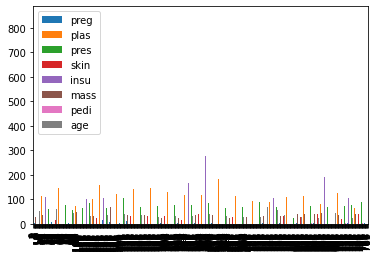

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataFrame = pd.read_csv('diabetes.csv')
display(dataFrame)
dataFrame.plot(kind = 'bar')
dataFrame_colString = dataFrame.select_dtypes(include = object)
dataFrame_colString.head() 
dataFrame['class'] = np.where(dataFrame['class'].eq('tested_positive'), 1, 0)
len(dataFrame)
dataFrame.ndim
dataFrame.size
dataFrame.rename(columns={'class': 'classDiabetes'}, inplace = True)
display(dataFrame)



Normalização de dados.

In [3]:
df_max_scaled = dataFrame.copy()
for column in df_max_scaled.columns[0:7]:
  df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()

display(df_max_scaled)

,preg,plas,pres,skin,insu,mass,pedi,age,classDiabetes
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,33,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,63,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,27,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,30,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,47,1


In [ ]:
learning_rate = 0.01
training_epochs = 30
display_steps = 100

n_input = 4
n_hidden = 2
n_output = 2

Divisão da base de dados em treino e teste.

In [4]:
from sklearn.model_selection import train_test_split

dataFrame.sample(frac=1)

X = dataFrame.drop("classDiabetes",axis=1)
y = dataFrame["classDiabetes"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25)
(len(X_train),len(X_test))


(576, 192)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model


def redeUm():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(3, name='FC1', activation='relu', kernel_initializer='he_uniform')(inputs)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation(Dense(1, activation='linear'))(layer)
    modelUm = Model(inputs=inputs, outputs=layer)
    return modelUm

modelUm = redeUm()
modelUm.summary()


Model: "model_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 3)                 27        
                                                                 
 OutLayer (Dense)            (None, 1)                 4         
                                                                 
 activation_98 (Activation)  (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


A saída de streaming foi truncada nas últimas 5000 linhas.
18/18 [==============================] - 0s 6ms/step - loss: 0.1798 - accuracy: 0.7292 - val_loss: 0.1662 - val_accuracy: 0.7656
Epoch 202/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1795 - accuracy: 0.7326 - val_loss: 0.1682 - val_accuracy: 0.7656
Epoch 203/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1772 - accuracy: 0.7240 - val_loss: 0.1646 - val_accuracy: 0.7812
Epoch 204/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1783 - accuracy: 0.7378 - val_loss: 0.1710 - val_accuracy: 0.7708
Epoch 205/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1787 - accuracy: 0.7240 - val_loss: 0.1656 - val_accuracy: 0.7656
Epoch 206/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1790 - accuracy: 0.7205 - val_loss: 0.1668 - val_accuracy: 0.7604
Epoch 207/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.7

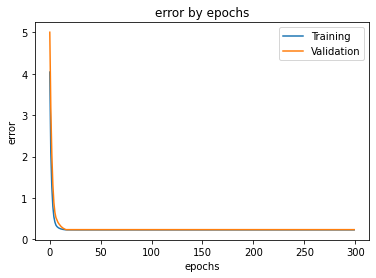

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model


for i in range(30):
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(3, name='FC1', activation='relu', kernel_initializer='he_uniform')(inputs)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation(Dense(1, activation='linear'))(layer)
    modelUm = Model(inputs=inputs, outputs=layer)

    modelUm.compile(loss='mean_squared_error', metrics=['accuracy'])
    h = modelUm.fit(x = X_train, y = y_train, epochs=300, validation_data=(X_test, y_test))

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])



Epoch 1/10
18/18 [==============================] - 1s 11ms/step - loss: 1361.8156 - accuracy: 0.5243 - val_loss: 828.8478 - val_accuracy: 0.5625
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 536.3049 - accuracy: 0.5122 - val_loss: 357.3803 - val_accuracy: 0.5885
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 261.9829 - accuracy: 0.5226 - val_loss: 214.4963 - val_accuracy: 0.5625
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 176.1542 - accuracy: 0.5417 - val_loss: 163.3308 - val_accuracy: 0.5885
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 133.9733 - accuracy: 0.5660 - val_loss: 123.0630 - val_accuracy: 0.5833
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 102.4878 - accuracy: 0.5781 - val_loss: 97.6643 - val_accuracy: 0.6198
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 80.9075 - accuracy: 0.6042 - val_loss: 78.5372 - val_accuracy: 

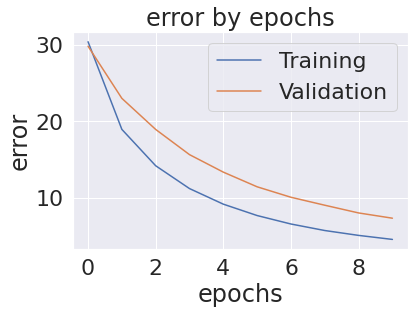

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model


for i in range(30):
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(5, name='FC1', activation='relu', kernel_initializer='he_uniform')(inputs)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation(Dense(1, activation='linear'))(layer)
    modelDois = Model(inputs=inputs, outputs=layer)

    modelDois.compile(loss='mean_squared_error', metrics=['accuracy'])
    h = modelDois.fit(x = X_train, y = y_train, epochs=10, validation_data=(X_test, y_test))

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])



Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 3963.8455 - accuracy: 0.5174 - val_loss: 2984.8271 - val_accuracy: 0.5677
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 2094.0928 - accuracy: 0.5035 - val_loss: 1594.9694 - val_accuracy: 0.5260
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 1135.1783 - accuracy: 0.4878 - val_loss: 839.3063 - val_accuracy: 0.5312
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 630.4753 - accuracy: 0.4757 - val_loss: 492.3272 - val_accuracy: 0.5052
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 394.6698 - accuracy: 0.4566 - val_loss: 355.9509 - val_accuracy: 0.4531
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 290.5397 - accuracy: 0.4688 - val_loss: 296.1752 - val_accuracy: 0.4271
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 235.4157 - accuracy: 0.4497 - val_loss: 245.1749 - val_acc

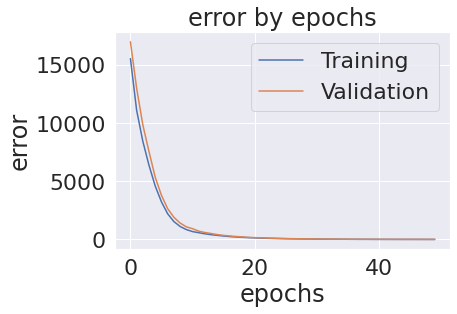

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model


for i in range(30):
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(7, name='FC1', activation='relu', kernel_initializer='he_uniform')(inputs)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation(Dense(1, activation='linear'))(layer)
    modelTres = Model(inputs=inputs, outputs=layer)

    modelTres.compile(loss='mean_squared_error', metrics=['accuracy'])
    h = modelTres.fit(x = X_train, y = y_train, epochs=50, validation_data=(X_test, y_test))

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])



Epoch 1/100
18/18 [==============================] - 2s 14ms/step - loss: 1.0724 - val_loss: 0.3606
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5906 - val_loss: 1.4521
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5517 - val_loss: 0.6236
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5712 - val_loss: 0.1639
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5576 - val_loss: 0.2514
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4973 - val_loss: 0.2990
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.7099 - val_loss: 0.1557
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3187 - val_loss: 0.9208
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6609 - val_loss: 0.8919
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5924 - val_loss: 0.3269
Epoch 11

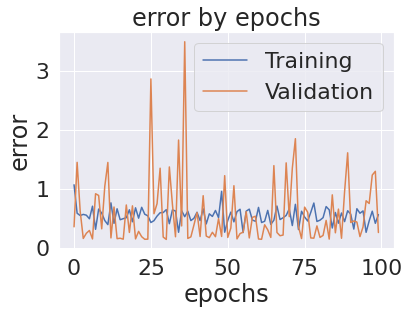

In [ ]:
from tensorflow.keras.optimizers import Adam

modelDois.compile(loss='mean_squared_error', metrics=['accuracy'])
h = modelDois.fit(x = X_train, y = y_train, epochs=100, validation_data=(X_test, y_test))

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 0.7610 - accuracy: 0.6441 - val_loss: 0.6366 - val_accuracy: 0.6458
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.6510 - val_loss: 0.6339 - val_accuracy: 0.6458
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7661 - accuracy: 0.6406 - val_loss: 0.6322 - val_accuracy: 0.6510
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.6424 - val_loss: 0.6332 - val_accuracy: 0.6562
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.6476 - val_loss: 0.6308 - val_accuracy: 0.6510
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7353 - accuracy: 0.6458 - val_loss: 0.6318 - val_accuracy: 0.6510
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7148 - accuracy: 0.6476 - val_loss: 0.6290 - val_accuracy: 0.6510
Epoch 8/100


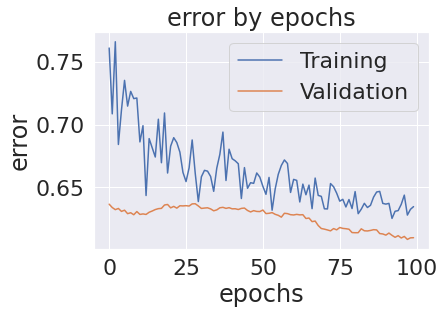

In [ ]:
from tensorflow.keras.optimizers import Adam

modelTres.compile(loss='binary_crossentropy', metrics=['accuracy'])
h = modelTres.fit(x = X_train, y = y_train, epochs=100, validation_data=(X_test, y_test))

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('error by epochs')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend(['Training', 'Validation'])

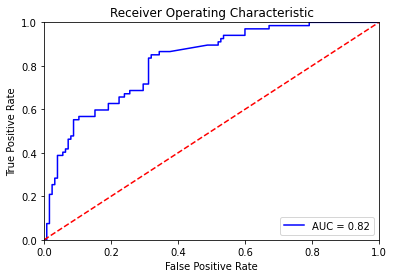

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

probs = modelUm.predict_on_batch(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

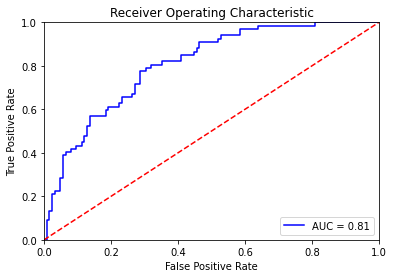

In [ ]:
probs = modelDois.predict_on_batch(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

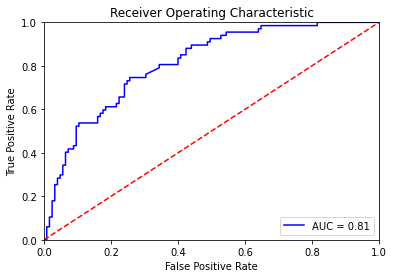

In [ ]:
probs = modelTres.predict_on_batch(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
log_reg = log_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8177083333333334

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


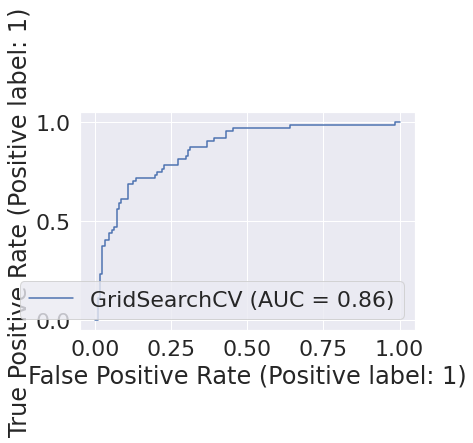

In [12]:
from sklearn.metrics import plot_roc_curve
y_preds = gs_log_reg.predict(X_test)
y_preds
np.array(y_test)
plot_roc_curve(gs_log_reg,X_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       128
           1       0.75      0.69      0.72        64

    accuracy                           0.82       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.82      0.82      0.82       192



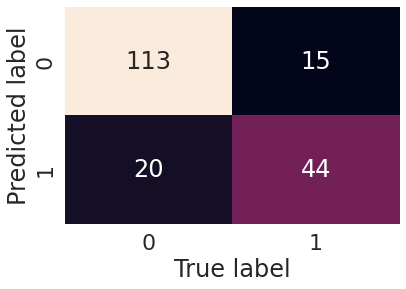

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label")

print(classification_report(y_test, y_preds))



In [ ]:
from sklearn.model_selection import cross_val_score
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
cv_acc = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc


0.75

In [ ]:
cv_precision = cross_val_score(clf, X, y,cv=10, scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7142036215119739

In [ ]:
cv_recall = cross_val_score(clf, X, y, cv=10, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.48091168091168085

In [ ]:
cv_f1 = cross_val_score(clf, X, y, cv=10, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.569372018074834

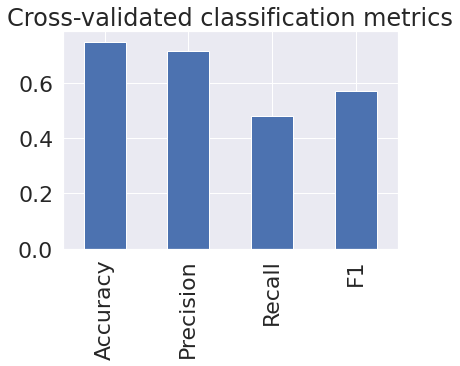

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [ ]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train);
clf.coef_

feature_dict = dict(zip(dataFrame.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.005107110634677071,
 'insu': 6.668666405158198e-05,
 'mass': 0.022302675715509507,
 'pedi': 0.24107618276549694,
 'plas': 0.02185873797746304,
 'preg': 0.11444846549794814,
 'pres': -0.023595181857656643,
 'skin': -0.0008715547302358215}

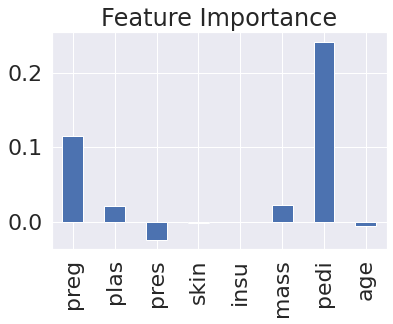

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
import pickle

pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7604166666666666

In [ ]:
X_test.head(1)


,preg,plas,pres,skin,insu,mass,pedi,age
138,0,129,80,0,0,31.2,0.703,29


In [ ]:
preg = input()
plas = input()
press = input()
skin = input()
insu = input()
mass = input()
pedi = input()
age = input()

45
20
30
2
123
58
33
19


In [ ]:
row_df = pd.DataFrame([pd.Series([preg,plas,press,skin,insu,mass,pedi,age])])
row_df


,0,1,2,3,4,5,6,7
0,45,20,30,2,123,58,33,19


In [ ]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.9999999999999831


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
loaded_model.predict(row_df)[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


True